# NAV Trade Code

In [1]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
# Read the GBTC Data
gbtc_historical_data = pd.read_csv(
    Path('./Resources/GBTC_Price_Data.csv'),
    index_col='Date',
    parse_dates=True
)

# Remove the dollar signs
gbtc_historical_data['Close/Last'] = gbtc_historical_data['Close/Last'].str.replace("$","")
gbtc_historical_data['Open'] = gbtc_historical_data['Open'].str.replace("$","")
gbtc_historical_data['High'] = gbtc_historical_data['High'].str.replace("$","")
gbtc_historical_data['Low'] = gbtc_historical_data['Low'].str.replace("$","")

# Cast the string numbers as floats
gbtc_historical_data['Close/Last'] = gbtc_historical_data['Close/Last'].astype(float).round(2)
gbtc_historical_data['Open'] = gbtc_historical_data['Open'].astype(float).round(2)
gbtc_historical_data['High'] = gbtc_historical_data['High'].astype(float).round(2)
gbtc_historical_data['Low'] = gbtc_historical_data['Low'].astype(float).round(2)

display(gbtc_historical_data.head())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-11-01,26.89,3498576.0,27.00,27.27,26.71
2023-10-31,26.76,2940913.0,26.50,26.83,26.13
2023-10-30,26.48,4704114.0,25.70,26.97,25.70
2023-10-27,25.07,3978757.0,25.86,26.40,24.85
2023-10-26,25.77,5328245.0,26.44,26.50,25.36


In [3]:
# Read the BTC Data
btc_historical_data = pd.read_csv(
    Path('./Resources/BTC_Price_Data.csv'), index_col='Date', parse_dates=True
)

# Sort the index
btc_historical_data.sort_index(ascending=False, inplace=True)

# Cast the string numbers as floats
btc_historical_data['Open'] = btc_historical_data['Open'].astype(float).round(2)
btc_historical_data['High'] = btc_historical_data['High'].astype(float).round(2)
btc_historical_data['Low'] = btc_historical_data['Low'].astype(float).round(2)
btc_historical_data['Close'] = btc_historical_data['Close'].astype(float).round(2)
btc_historical_data['Adj Close'] = btc_historical_data['Adj Close'].astype(float).round(2)
btc_historical_data['Volume'] = btc_historical_data['Volume'].astype(float).round(2)

display(btc_historical_data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-03,34942.47,34942.47,34692.80,34692.80,34692.80,2.069136e+10
2023-11-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,34657.27,35527.93,34170.69,35437.25,35437.25,2.244627e+10
2023-10-31,34500.08,34719.25,34083.31,34667.78,34667.78,1.575827e+10
2023-10-30,34531.74,34843.93,34110.97,34502.36,34502.36,1.718486e+10


In [4]:
# Read the GBTC holdings
# Read the BTC Data
gbtc_holdings_data = pd.read_csv(
    Path('./Resources/GBTC_Holdings.csv')
    # , index_col='Date', parse_dates=True
)

# Extract the month number from the month name by mapping a dictionary to the dataset
# Create the map
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
# Apply the map
gbtc_holdings_data['month_number'] = gbtc_holdings_data.Month.map(month_map)

# Create a column "year_month" to be merged later
gbtc_holdings_data['year_month'] = gbtc_holdings_data['Year'].astype(str) + "_" + gbtc_holdings_data['month_number'].astype(str)

# Remove the commas in the dataset and convert the strings to integers
gbtc_holdings_data['GBTC Holdings (BTC)'] =  gbtc_holdings_data['GBTC Holdings (BTC)'].replace(",","",regex=True).astype(int)

gbtc_holdings_data.head(15)

,Month,Year,GBTC Holdings (BTC),month_number,year_month
0,Jan,2023,635420,1,2023_1
1,Feb,2023,635420,2,2023_2
2,Mar,2023,635420,3,2023_3
3,Apr,2023,635420,4,2023_4
4,May,2023,635420,5,2023_5
5,Jun,2023,635420,6,2023_6
6,Jul,2023,635420,7,2023_7
7,Aug,2023,635420,8,2023_8
8,Sep,2023,635420,9,2023_9
9,Oct,2023,635420,10,2023_10


In [5]:
# Reorganize the dataframe

# Isolate the closing price and rename the one column to be GBTC_Close
GBTC = gbtc_historical_data[['Close/Last']].rename(columns={'Close/Last' : 'GBTC_Close'})

# GBTC.head()

# Isolate the closing price and rename the one column to be BTC_Close
BTC = btc_historical_data[['Close']].rename(columns={'Close' : 'BTC_Close'})

# BTC.head()

# Combine the two dataframes into one dataframe based on the date
combined_df = pd.concat([GBTC,BTC],axis="columns", join="inner")

# Create a column "year_month" to be merged later
combined_df['year_month'] = combined_df.index.year.astype(str) + "_" + combined_df.index.month.astype(str)

# Create a "date" column in addition to the index, because the index will be lost after the merge
combined_df['Date'] = combined_df.index

combined_df.head()

,GBTC_Close,BTC_Close,year_month,Date
Date,,,,
2023-11-01,26.89,35437.25,2023_11,2023-11-01
2023-10-31,26.76,34667.78,2023_10,2023-10-31
2023-10-30,26.48,34502.36,2023_10,2023-10-30
2023-10-27,25.07,33909.80,2023_10,2023-10-27
2023-10-26,25.77,34156.65,2023_10,2023-10-26


In [6]:
# Merge the dataframes for pricing information and GBTC holdings into one dataframe
merged_df = combined_df.merge(gbtc_holdings_data, left_on="year_month", right_on="year_month")[['Date', 'GBTC_Close', 'BTC_Close', 'GBTC Holdings (BTC)']]

# Assume that there are 692,314,200 outstanding shares throughout the time period
merged_df['GBTC_Shares'] = int(692314200)

# Add a holdings/share column
merged_df['GBTC_Assets_per_Share'] = ( merged_df['GBTC Holdings (BTC)'] * merged_df['BTC_Close'] ) / merged_df['GBTC_Shares']

# Calculate the premium or discount for GBTC
merged_df['Premium/Discount'] = merged_df['GBTC_Close'] - merged_df['GBTC_Assets_per_Share']

# Calculate the percent premium or discount
merged_df['Discount_to_NAV'] = (merged_df['Premium/Discount'] / merged_df['GBTC_Assets_per_Share']) * 100

# Set the index of the merged dataframe to be the date
merged_df.set_index('Date', inplace=True)

# Remove everything before 1/1/2020
merged_df = merged_df.drop(merged_df.index[merged_df.index < '2020-01-01'])

merged_df

,GBTC_Close,BTC_Close,GBTC Holdings (BTC),GBTC_Shares,GBTC_Assets_per_Share,Premium/Discount,Discount_to_NAV
Date,,,,,,,
2023-11-01,26.89,35437.25,635420,692314200,32.525026,-5.635026,-17.325201
2023-10-31,26.76,34667.78,635420,692314200,31.818791,-5.058791,-15.898753
2023-10-30,26.48,34502.36,635420,692314200,31.666965,-5.186965,-16.379735
2023-10-27,25.07,33909.80,635420,692314200,31.123101,-6.053101,-19.448902
2023-10-26,25.77,34156.65,635420,692314200,31.349665,-5.579665,-17.798166
...,...,...,...,...,...,...,...
2020-01-08,9.32,8079.86,564367,692314200,6.586614,2.733386,41.499109
2020-01-07,10.10,8163.69,564367,692314200,6.654951,3.445049,51.766702
2020-01-06,8.99,7769.22,564367,692314200,6.333384,2.656616,41.946242


In principle, the total value of GBTC (market capitalization) should be equal to the total value of GBTC's assets under management.  So:

Total value of GBTC = Total value of GBTCs assets

( GBTC_Close * Number_of_shares ) = ( BTC_Close * GBTC_Holdings )

Or Alteratively:

GBTC_Close = ( BTC_Close * GBTC_Holdings ) / Number_of_shares

In [7]:
# Isolate the GBTC closing price and assets/share
close_vs_holdings_per_share = merged_df[['GBTC_Close','GBTC_Assets_per_Share']]

close_vs_holdings_per_share = close_vs_holdings_per_share.rename(columns={'GBTC_Close':'GBTC Closing Price', 'GBTC_Assets_per_Share':'GBTC Assets/Share'})

close_vs_holdings_per_share

,GBTC Closing Price,GBTC Assets/Share
Date,,
2023-11-01,26.89,32.525026
2023-10-31,26.76,31.818791
2023-10-30,26.48,31.666965
2023-10-27,25.07,31.123101
2023-10-26,25.77,31.349665
...,...,...
2020-01-08,9.32,6.586614
2020-01-07,10.10,6.654951
2020-01-06,8.99,6.333384


In [8]:
close_vs_holdings_per_share.hvplot(
    xlabel="Date",
    ylabel="Dollars",
    title="GBTC Closing Price vs. Assets/Share",
    # width=1500,
    width=1200,
    height=500
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

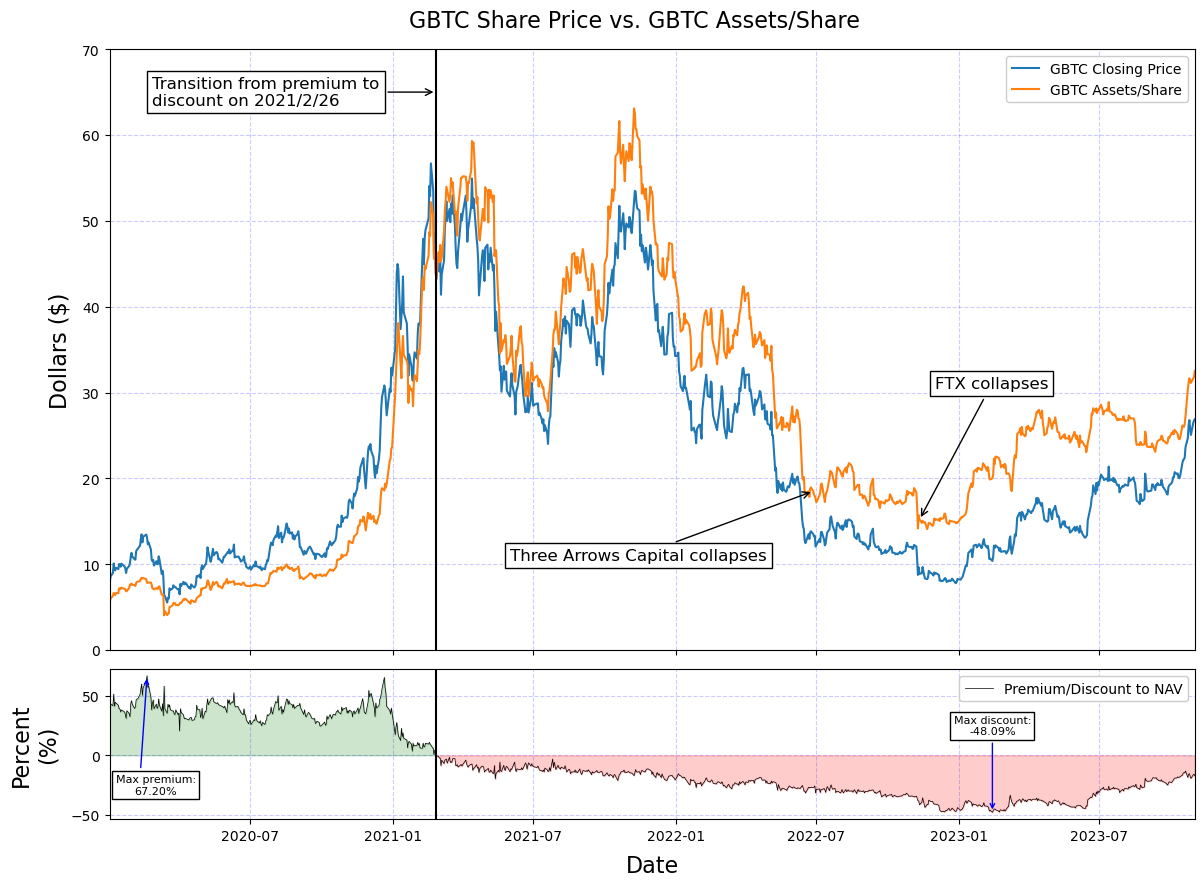

In [9]:
# Matplotlib

x = close_vs_holdings_per_share.index
y = close_vs_holdings_per_share['GBTC Closing Price']
z = close_vs_holdings_per_share['GBTC Assets/Share']
w = merged_df['Discount_to_NAV']

# plt.figure(figsize=(14,7))
# plt.subplot(2,1,1) #(number of rows, number of columns, index)

# Define the number of subplots (2 rows, 1 column), the shared axis, the respective height ratios of the two plots, and the size of the combined figure
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [4, 1]},figsize=(14,10))

# Add a title for the combined figure
fig.suptitle(r'GBTC Share Price vs. GBTC Assets/Share', fontsize=16, y=0.92)

# Set the whitespace distance between the two subplots
fig.subplots_adjust(wspace=0, hspace=0.05)

# Plot the GBTC closing price vs the AUM/share
ax1.plot(x, y, label='GBTC Closing Price')
ax1.plot(x, z, label='GBTC Assets/Share')

# Plot a vertical line at the transition point from premium to discount
ax1.axvline(x=pd.to_datetime('2021-02-26 00:00:00'), color='k'
            #, label = 'Transition from premium to discount (2021/02/26)'
           )

# Set the axes boundaries for the first plot
ax1.axis([
    min(close_vs_holdings_per_share.index), # Minimum value on the x-axis
    max(close_vs_holdings_per_share.index), # Maximum value on the x-axis
    0, # Minimum value on the y-axis
    70 # Maximum value on the y-axis
])

# Create a light grid to make the plot easier to read
ax1.grid(which='major', color='b', linestyle='--', alpha=0.2)

# Create a label along the y-axis for the first plot
ax1.set_ylabel(r'Dollars (\$)',fontsize=16,labelpad=8)

# Annotations:
# Annotate the transition line from premium to discount
ax1.annotate(
    'Transition from premium to\ndiscount on 2021/2/26', #Annotation text
    xycoords='data', # How the coordinates are interpreted
    xy = (pd.to_datetime('2021-02-26 00:00:00'),65), # Location of the annotation point: 75% to the right, 50% up
    xytext=(pd.to_datetime('2020-2-26 00:00:00'),65), # Location of the annotation text
    verticalalignment = 'center', 
    bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
    size=12
)

# Annotate when Three Arrows Capital collapses
ax1.annotate(
    'Three Arrows Capital collapses', #Annotation text
    xycoords='data', # How the coordinates are interpreted
    xy = (pd.to_datetime('2022-06-27 00:00:00'),18.511345), # Location of the annotation point: 75% to the right, 50% up
    xytext=(pd.to_datetime('2021-06-01 00:00:00'),11), # Location of the annotation text
    verticalalignment = 'center', 
    bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
    size=12
)

# Annotate when FTX collapses
ax1.annotate(
    'FTX collapses', #Annotation text
    xycoords='data', # How the coordinates are interpreted
    xy = (pd.to_datetime('2022-11-11 00:00:00'),15.207153), # Location of the annotation point: 75% to the right, 50% up
    xytext=(pd.to_datetime('2022-12-01 00:00:00'),31), # Location of the annotation text
    verticalalignment = 'center', 
    bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
    size=12
)

# Set the legend properties
ax1.legend(
    framealpha=1.0
    # , prop={'size':15}
)

# Note the switch to ax2 below

# Plot the premium/discount to NAV on the second plot 
ax2.plot(x, w, label='Premium/Discount to NAV', color='k', linewidth=0.5)

# Plot a vertical line at the transition from premium to discount
ax2.axvline(x=pd.to_datetime('2021-02-26 00:00:00'), color='k')

# Create a light grid so the plot is easier to read
ax2.grid(which='major', color='b', linestyle='--', alpha=0.2)

# Label the x and y axes.  Note that the x-axis is shared between the two plots.
ax2.set_xlabel(r'Date',fontsize=16,labelpad=8)
ax2.set_ylabel('Percent\n(%)',fontsize=16,labelpad=8)

# Fill green when GBTC is at a premium
ax2.fill_between(
        x=x, 
        y1=w, 
        where= (w>0),
        color= "g",
        alpha= 0.2)

# Fill red when GBTC is at a discount
ax2.fill_between(
        x=x, 
        y1=w, 
        where= (w<0),
        color= "r",
        alpha= 0.2)

# Annotate the minimum discount on the second plot
ax2.annotate(
    'Max discount:\n-48.09%', #Annotation text
    xycoords='data', # How the coordinates are interpreted
    xy = (pd.to_datetime('2023-02-13 00:00:00'),-48.091309), # Location of the annotation point: 75% to the right, 50% up
    xytext=(pd.to_datetime('2023-2-13 00:00:00'),25), # Location of the annotation text
    verticalalignment = 'center',
    ha='center',
    bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    arrowprops=dict(arrowstyle='->', color='b'), # Arrow properties
    size=8
)

# Annotate the maximum premium on the second plot
ax2.annotate(
    'Max premium:\n67.20%', #Annotation text
    xycoords='data', # How the coordinates are interpreted
    xy = (pd.to_datetime('2020-02-19 00:00:00'),67.196511), # Location of the annotation point: 75% to the right, 50% up
    xytext=(pd.to_datetime('2020-3-01 00:00:00'),-25), # Location of the annotation text
    verticalalignment = 'center',
    ha = 'center',
    bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    arrowprops=dict(arrowstyle='->', color='b', relpos=(0.3,0.5)), # Arrow properties
    size=8
)

# Create a legend for the second plot
ax2.legend(
    framealpha=1.0
    # , prop={'size':15}
)

# Save the figure to the current folder
# plt.savefig('GBTC_price_vs_assets_per_share.pdf')
# plt.savefig('GBTC_price_vs_assets_per_share.png')

plt.show()

# print(x)

In [10]:
merged_df[merged_df['Discount_to_NAV'] > 0].index.max()

Timestamp('2021-02-25 00:00:00')

In [11]:
merged_df[merged_df['Discount_to_NAV'] == merged_df['Discount_to_NAV'].min()]

,GBTC_Close,BTC_Close,GBTC Holdings (BTC),GBTC_Shares,GBTC_Assets_per_Share,Premium/Discount,Discount_to_NAV
Date,,,,,,,
2023-02-13,10.39,21808.1,635420,692314200,20.015916,-9.625916,-48.091309


In [12]:
merged_df[merged_df['Discount_to_NAV'] == merged_df['Discount_to_NAV'].max()]

,GBTC_Close,BTC_Close,GBTC Holdings (BTC),GBTC_Shares,GBTC_Assets_per_Share,Premium/Discount,Discount_to_NAV
Date,,,,,,,
2020-02-19,13.13,9633.39,564367,692314200,7.853035,5.276965,67.196511


In [13]:
merged_df[merged_df.index == pd.to_datetime('2022-06-27 00:00:00')]

,GBTC_Close,BTC_Close,GBTC Holdings (BTC),GBTC_Shares,GBTC_Assets_per_Share,Premium/Discount,Discount_to_NAV
Date,,,,,,,
2022-06-27,13.51,20735.48,618055,692314200,18.511345,-5.001345,-27.017729


In [14]:
merged_df[merged_df.index == pd.to_datetime('2022-11-11 00:00:00')]

,GBTC_Close,BTC_Close,GBTC Holdings (BTC),GBTC_Shares,GBTC_Assets_per_Share,Premium/Discount,Discount_to_NAV
Date,,,,,,,
2022-11-11,8.87,17034.29,618055,692314200,15.207153,-6.337153,-41.672186


In [15]:
print(close_vs_holdings_per_share.index.min())

2020-01-02 00:00:00


In [16]:
min(close_vs_holdings_per_share.index)

Timestamp('2020-01-02 00:00:00')

In [17]:
"""
Other plot ideas:
    1) Add volume
    2) Discount/surplus
    3) Annotations
"""

'\nOther plot ideas:\n    1) Add volume\n    2) Discount/surplus\n    3) Annotations\n'